In [1]:
import pandas as pd
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


In [2]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year', 'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp', 'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad', 'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white', 'share_black', 'share_hispanic', 'p_income', 'h_income', 'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov', 'urate', 'college'], dtype='object')

In [5]:
counts=police_killings['raceethnicity'].value_counts()

([<matplotlib.axis.XTick at 0x7f14866b92e8>,
 <a list of 6 Text xticklabel objects>)

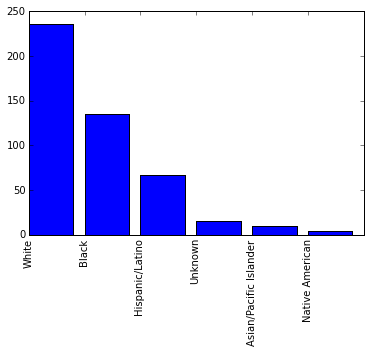

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(6), counts)
plt.xticks(range(6), counts.index, rotation="vertical")

In particular, you might want to look up the percentage of each race in the US population as a whole. How do those percentages match up to the chart you just made?

In [8]:
counts / sum(counts)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
dtype: float64

Racial breakdown
It looks like people identified as Black are far overrepresented in the shootings versus in the population of the US (28% vs 16%). You can see the breakdown of population by race here.
People identified as Hispanic appear to be killed about as often as random chance would account for (14% of the people killed as Hispanic, versus 17% of the overall population).
Whites are underrepresented among shooting victims vs their population percentage, as are Asians.

## Shootings by regional income

The p_income column is median personal income by census area. Looking at this will tell us if more of the shootings happened in less affluent areas or more affluent areas.

You can explore this relationship by making a histogram of the column. You'll need to do some data cleaning in order to construct the histogram, though, as not all the values in the p_income column are numeric. When an income couldn't be found for the census area, the value is a -. Because of this, the column has a string type instead of an integer type.

To fix this, and be able to construct a histogram, you'll need to remove all the - values from the column, then convert the column to an integer type.

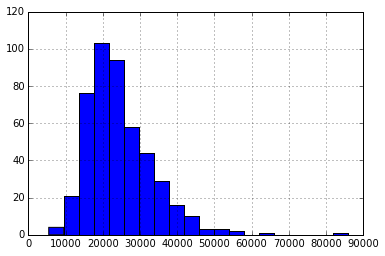

In [9]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).hist(bins=20)


In [10]:
police_killings["p_income"][police_killings["p_income"] != "-"].astype(float).median()


22348.0

## Income breakdown
According to the Census, median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas. Our sample size is relatively small, though, so it's hard to make sweeping conclusions.

In [11]:
state_pop = pd.read_csv("state_population.csv")
counts = police_killings["state_fp"].value_counts()
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states = states.merge(state_pop, on="STATE")

In [12]:
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shootings"] / states["pop_millions"]
states.sort("rate")

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
11,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
12,39,10,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.861073
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


In [13]:
pk = police_killings[
    (police_killings["share_white"] != "-") & 
    (police_killings["share_black"] != "-") & 
    (police_killings["share_hispanic"] != "-")
]

pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/dsserver/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [14]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

In [15]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]
ls[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [16]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

State by state rates
It looks like the states with low rates of shootings tend to have a higher proportion of blacks in the population, and a lower proportion of hispanics in the census regions where the shootings occur. It looks like the income of the counties where the shootings occur is higher.
States with high rates of shootings tend to have high hispanic population shares in the counties where shootings occur.

Here are some potential next steps:

Explore some of the columns we didn't look at. Here's a full list of columns.
Integrate more outside data sources. Here are some ideas:
Data.gov - http://www.data.gov/
Socrata - https://opendata.socrata.com/
Github - https://github.com/caesar0301/awesome-public-datasets
Census Data - https://www.census.gov
Map out state-level data in a choropleth map with matplotlib. Here's an example.
Look more into the cause column, and see if there are any patterns.
Is there any other data on police brutality that could augment this analysis?
Look more broadly at crime rates where the shootings occured, and see if there are any correlations.